In [1]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# importing the train dataset into pandas DataFrame
space_df = pd.read_csv('train.csv')

In [3]:
# Viewing the first 5 rows of the ataset
space_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
# Obtaining information about the dataset
space_df.shape

(8693, 14)

There are 8693 rows and 14 columns in the dataset

In [5]:
# Obtaining information about the dataset
space_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
# Obtaining information about the dataset
space_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


All other columns contain null values with the exception of the PassengerId column. Hence, the data must be cleaned

# UNIVARIATE ANALYSIS

# PassengerId

In [7]:
# Viewing the passengerId column
space_df['PassengerId'].value_counts()

0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64

Every passenger has a unique Id.

## HomePlanet

In [8]:
# Viewing the HomePlanet column
space_df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [9]:
# filling null values in the Home Planet column with 'Earth' since it appears the most
space_df['HomePlanet'] = space_df['HomePlanet'].fillna('Earth')

In [10]:
# Viewing the HomePlanet column
space_df['HomePlanet'].value_counts()

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

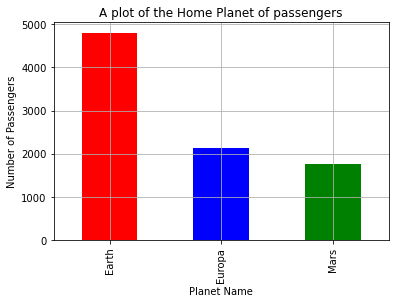

In [11]:
# Plotting a bar chart of the HomePlanet column
space_df['HomePlanet'].value_counts().plot(kind='bar', color=['r', 'b', 'g'])
plt.title('A plot of the Home Planet of passengers')
plt.xlabel('Planet Name')
plt.ylabel('Number of Passengers')
plt.grid()
plt.show()

Most of the passengers(4803) departed from Earth. 2131 departed from Europa and 1759 departed from Mars.

## CryoSleep

In [12]:
# viewing the categories under the crosleep column
space_df['CryoSleep'].unique()

array([False, True, nan], dtype=object)

In [13]:
# Determining the number of times each bool occurs
space_df['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [14]:
# replace null values with False
space_df['CryoSleep'] = space_df['CryoSleep'].fillna(False)

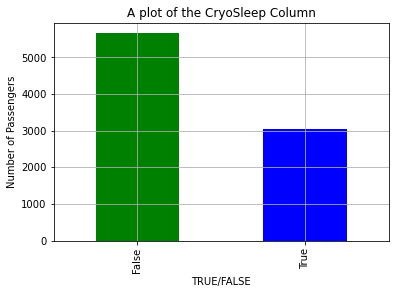

In [15]:
# Plotting a bar chart of the CryoSleep column
space_df['CryoSleep'].value_counts().plot(kind='bar', color=['g', 'b', 'y'])
plt.title('A plot of the CryoSleep Column')
plt.xlabel('TRUE/FALSE')
plt.ylabel('Number of Passengers')
plt.grid()
plt.show()

Only about 3000 passengers elected to be put into the suspended animation for the duration of the voyage.

## Cabin

In [16]:
# viewing the items under the Cabin column
space_df['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [17]:
# viewing the individual items under the Cabin column
space_df['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

More than one person was housed in a cabin

In [18]:
# Dividing the cabin number into Deck, Number and Side
space_df[['Deck', 'Cabin_num', 'Side']] = space_df['Cabin'].str.split("/", expand=True)
# Removing the Cabin Column from the Dataset
space_df.drop('Cabin', axis=1)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


## Destination

In [19]:
# viewing the items under the Destination column
space_df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [20]:
# viewing the counts of the items under the Destination column
space_df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [21]:
# fill null values with TRAPPIST-1e
space_df['Destination'] = space_df['Destination'].fillna('TRAPPIST-1e')

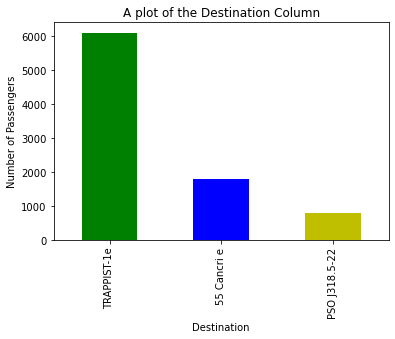

In [22]:
# Plotting a bar chart of the Destination column
space_df['Destination'].value_counts().plot(kind='bar', color=['g', 'b', 'y'])
plt.title('A plot of the Destination Column')
plt.xlabel('Destination')
plt.ylabel('Number of Passengers')
plt.show()

TRAPPIST-1e is the Destination of most passengers

## Age

In [23]:
# filling null values with the median age 27
space_df['Age'] = space_df['Age'].fillna(27)

In [24]:
# viewing the mean age
space_df['Age'].mean()

28.790291038766824

The mean age is 29 years.

From the description of the data, the 75th percentile is 38. Meaning that, most of the passengers are less than 38 years.

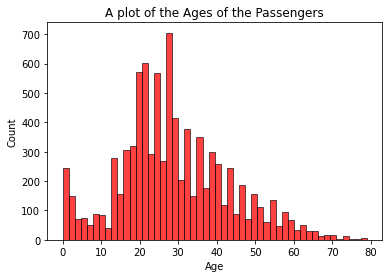

In [25]:
# plotting a histogram the Age column
sns.histplot(space_df['Age'], bins=50, color='r')
plt.title('A plot of the Ages of the Passengers')
plt.xlabel('Age')
plt.show()

The Age column appears to be right skewed

## VIP

In [26]:
# viewing elements in the VIP column
space_df['VIP'].unique()

array([False, True, nan], dtype=object)

In [27]:
# viewing count of each element in the VIP column
space_df['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [28]:
# replacing null values in the VIP column with 'False'
space_df['VIP'] = space_df['VIP'].fillna(False)

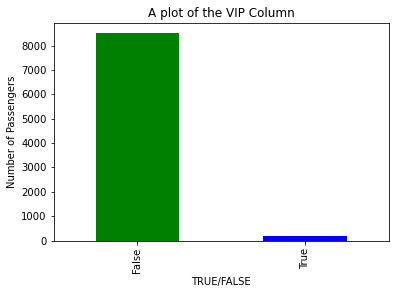

In [29]:
# Plotting a bar chart of the VIP column
space_df['VIP'].value_counts().plot(kind='bar', color=['g', 'b', 'y'])
plt.title('A plot of the VIP Column')
plt.xlabel('TRUE/FALSE')
plt.ylabel('Number of Passengers')
plt.show()

Only 199 Passengers joined the VIP

## Room Service

In [30]:
# Viewing the Room service Column
space_df['RoomService']

0         0.0
1       109.0
2        43.0
3         0.0
4       303.0
        ...  
8688      0.0
8689      0.0
8690      0.0
8691      0.0
8692    126.0
Name: RoomService, Length: 8693, dtype: float64

In [31]:
# Replacing null values with the mean of the data
mean_RS = space_df['RoomService'].mean()
mean_RS = round(mean_RS, 2)
space_df['RoomService'] = space_df['RoomService'].fillna(mean_RS)

In [32]:
# viewing maximum and minimum values of the Room Service Column
max_value = space_df['RoomService'].max()
min_value = space_df['RoomService'].min()

print('The minimum price of bill paid for the room service is ' + str(min_value))
print('The maximum price of bill paid for the room service is ' + str(max_value))

The minimum price of bill paid for the room service is 0.0
The maximum price of bill paid for the room service is 14327.0


## FoodCourt

In [33]:
# Viewing the food court column
space_df['FoodCourt']

0          0.0
1          9.0
2       3576.0
3       1283.0
4         70.0
         ...  
8688    6819.0
8689       0.0
8690       0.0
8691    1049.0
8692    4688.0
Name: FoodCourt, Length: 8693, dtype: float64

In [34]:
# Replacing null values with the mean of the data
mean_FC = space_df['FoodCourt'].mean()
mean_FC = round(mean_FC, 2)
space_df['FoodCourt'] = space_df['FoodCourt'].fillna(mean_FC)

In [35]:
# viewing maximum and minimum values of the Food Court Column
maxF_value = space_df['FoodCourt'].max()
minF_value = space_df['FoodCourt'].min()

print('The minimum bill issued to a passenger for Food is ' + str(minF_value))
print('The maximum bill issued to a passenger for Food is ' + str(maxF_value))

The minimum bill issued to a passenger for Food is 0.0
The maximum bill issued to a passenger for Food is 29813.0


## Shopping Mall

In [36]:
# Viewing the Shapping Mall column
space_df['ShoppingMall']

0          0.0
1         25.0
2          0.0
3        371.0
4        151.0
         ...  
8688       0.0
8689       0.0
8690    1872.0
8691       0.0
8692       0.0
Name: ShoppingMall, Length: 8693, dtype: float64

In [37]:
# Replacing null values with the mean of the data
mean_SM = space_df['ShoppingMall'].mean()
mean_SM = round(mean_SM, 2)
space_df['ShoppingMall'] = space_df['ShoppingMall'].fillna(mean_SM)

In [38]:
# viewing maximum and minimum values of the Shopping Mall Column
max_SM_value = space_df['ShoppingMall'].max()
min_SM_value = space_df['ShoppingMall'].min()

print('The minimum bill issued to a passenger for Shopping is ' + str(min_SM_value))
print('The maximum bill issued to a passenger for Shopping is ' + str(max_SM_value))

The minimum bill issued to a passenger for Shopping is 0.0
The maximum bill issued to a passenger for Shopping is 23492.0


From the data above, it shows that some passengers did not do shopping

## SPA

In [39]:
# Viewing the SPA column
space_df['Spa']

0          0.0
1        549.0
2       6715.0
3       3329.0
4        565.0
         ...  
8688    1643.0
8689       0.0
8690       1.0
8691     353.0
8692       0.0
Name: Spa, Length: 8693, dtype: float64

In [40]:
# Replacing null values with the mean of the data
mean_SP = space_df['Spa'].mean()
mean_SP = round(mean_SP, 2)
space_df['Spa'] = space_df['Spa'].fillna(mean_SP)

In [41]:
# viewing maximum and minimum values of the Spa Column
max_SP_value = space_df['Spa'].max()
min_SP_value = space_df['Spa'].min()

print('The minimum bill issued to a passenger for using the Spa is ' + str(min_SP_value))
print('The maximum bill issued to a passenger for using the Spa is ' + str(max_SP_value))

The minimum bill issued to a passenger for using the Spa is 0.0
The maximum bill issued to a passenger for using the Spa is 22408.0


From the data above, some passengers did not use the Spa

## VRDeck

In [42]:
# Viewing the VR Deck column
space_df['VRDeck']

0          0.0
1         44.0
2         49.0
3        193.0
4          2.0
         ...  
8688      74.0
8689       0.0
8690       0.0
8691    3235.0
8692      12.0
Name: VRDeck, Length: 8693, dtype: float64

In [43]:
# Replacing null values with the mean of the data
mean_VD = space_df['VRDeck'].mean()
mean_VD = round(mean_VD, 2)
space_df['VRDeck'] = space_df['VRDeck'].fillna(mean_VD)

In [44]:
# viewing maximum and minimum values of the VRDeck Column
max_VD_value = space_df['VRDeck'].max()
min_VD_value = space_df['VRDeck'].min()

print('The minimum bill issued to a passenger for using the VRDeck is ' + str(min_VD_value))
print('The maximum bill issued to a passenger for using the VRDeck is ' + str(max_VD_value))

The minimum bill issued to a passenger for using the VRDeck is 0.0
The maximum bill issued to a passenger for using the VRDeck is 24133.0


Some passengers did not make use of the VRDeck service

## Name

In [45]:
# Viewing names of each column
space_df['Name'].unique()

array(['Maham Ofracculy', 'Juanna Vines', 'Altark Susent', ...,
       'Fayey Connon', 'Celeon Hontichre', 'Propsh Hontichre'],
      dtype=object)

It can be seen that, every name appears once. Hence, we can decide to drop the name column for further analysis.

In [46]:
# Dropping the name column
space_df = space_df.drop('Name', axis=1)

## Transported

In [47]:
# Viewing unique values in the Transported column
space_df['Transported'].unique()

array([False,  True])

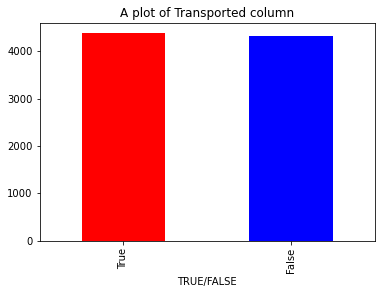

In [48]:
# A plot of the Transported column
space_df['Transported'].value_counts().plot(kind='bar', color = ['r', 'b'])
plt.title('A plot of Transported column')
plt.xlabel('TRUE/FALSE')
plt.show()

From the plot above, it shows that more passengers were transported to a different dimension.

## Deck

In [49]:
# Viewing the individual elements in the Deck Column
space_df['Deck'].unique()

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

In [50]:
# Viewing which element occurs the most
space_df['Deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64

Letter F occurs the most. Hence, we replace null values with the letter F

In [51]:
# Replace null values with letter F
space_df['Deck'] = space_df['Deck'].fillna('F')

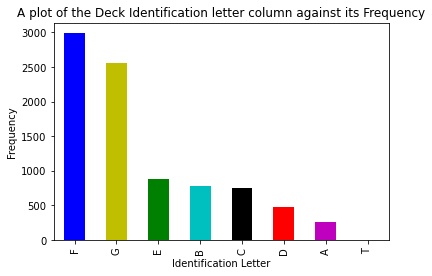

In [52]:
# A plot of the Deck column
space_df['Deck'].value_counts().plot(kind='bar', color = ['b', 'y', 'g', 'c', 'k', 'r', 'm', 'orange'])
plt.title('A plot of the Deck Identification letter column against its Frequency')
plt.xlabel('Identification Letter')
plt.ylabel('Frequency')
plt.show()

## Cabin_num column

In [53]:
# Viewing the Cabin_num column
space_df['Cabin_num'].value_counts()

82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: Cabin_num, Length: 1817, dtype: int64

In [54]:
# replacing null values with 82 since it occurs the most
space_df['Cabin_num'] = space_df['Cabin_num'].fillna(82)

## Side

In [55]:
# Viewing the unique elements in the Side column
space_df['Side'].unique()

array(['P', 'S', nan], dtype=object)

In [56]:
# finding which element occurs the most
space_df['Side'].value_counts()

S    4288
P    4206
Name: Side, dtype: int64

Letter P represents Port and letter S represents Starboard. The data shown above shows that, most of the passengers joined the Starboard. Hence, we replace all null values with the letter S.

In [57]:
# Replacing null values with S since it occurs the most
space_df['Side'] = space_df['Side'].fillna('S')

#### Dropping the Cabin since it is not needed anymore

In [58]:
space_df = space_df.drop('Cabin', axis=1)

In [59]:
# checking to see if there are null values in the data
space_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Cabin_num       0
Side            0
dtype: int64

The data above shows that, there are null values in the data set

# MULTIVARIATE ANALYSIS

In [60]:
# checking correlation of the columns
space_df.corr()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
CryoSleep,1.000000,-0.071323,-0.078281,-0.243986,-0.205682,-0.206366,-0.198392,-0.193107,0.460132
Age,-0.071323,1.000000,0.091863,0.067830,0.127983,0.032958,0.120878,0.099248,-0.074233
VIP,-0.078281,0.091863,1.000000,0.056595,0.126006,0.018483,0.060573,0.123092,-0.037261
RoomService,-0.243986,0.067830,0.056595,1.000000,-0.015521,0.052962,0.009925,-0.019207,-0.242048
FoodCourt,-0.205682,0.127983,0.126006,-0.015521,1.000000,-0.013934,0.220587,0.224275,0.046074
ShoppingMall,-0.206366,0.032958,0.018483,0.052962,-0.013934,1.000000,0.013678,-0.007189,0.010019
Spa,-0.198392,0.120878,0.060573,0.009925,0.220587,0.013678,1.000000,0.147957,-0.218791
VRDeck,-0.193107,0.099248,0.123092,-0.019207,0.224275,-0.007189,0.147957,1.000000,-0.204825
Transported,0.460132,-0.074233,-0.037261,-0.242048,0.046074,0.010019,-0.218791,-0.204825,1.000000


Since there is a very low correlation between the columns, multivariate analysis is insignificant

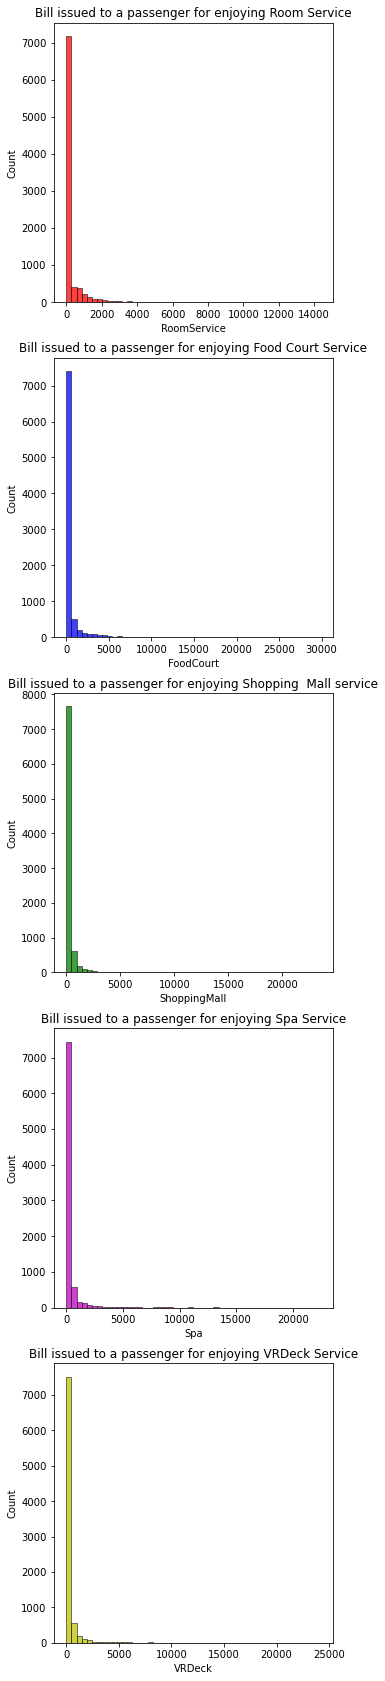

In [61]:
# plotting graphs of the remaining columns
fig, ax = plt.subplots(5, 1, figsize=(5, 12))
plt.subplots_adjust(top=2)

sns.histplot(space_df['RoomService'], color='r', bins=50, ax=ax[0])
ax[0].set_title('Bill issued to a passenger for enjoying Room Service')
sns.histplot(space_df['FoodCourt'], color='b', bins=50, ax=ax[1])
ax[1].set_title('Bill issued to a passenger for enjoying Food Court Service')
sns.histplot(space_df['ShoppingMall'], color='g', bins=50, ax=ax[2])
ax[2].set_title('Bill issued to a passenger for enjoying Shopping  Mall service')
sns.histplot(space_df['Spa'], color='m', bins=50, ax=ax[3])
ax[3].set_title('Bill issued to a passenger for enjoying Spa Service')
sns.histplot(space_df['VRDeck'], color='y', bins=50, ax=ax[4])
ax[4].set_title('Bill issued to a passenger for enjoying VRDeck Service')

plt.show()

# MACHINE LEARNING MODEL

### Preparing Data for machine Learning

In [62]:
# converting all categorical columns with numerical elements to numerical columns
space_df['PassengerId'] = space_df['PassengerId'].astype(int)
space_df['VIP'] = space_df['VIP'].astype(int)
space_df['Transported'] = space_df['Transported'].astype(int)
space_df['Cabin_num'] = space_df['Cabin_num'].astype(int)

In [63]:
# converting homeplanet to numerical values
planet = {'Earth':1, 'Europa':2, 'Mars':3}
space_df['HomePlanet'] = space_df['HomePlanet'].replace(planet)

In [64]:
# converting Destination to numerical values
destination = {'TRAPPIST-1e':1, 'PSO J318.5-22':2, '55 Cancri e':3}
space_df['Destination'] = space_df['Destination'].replace(destination)

In [65]:
# converting Deck column to numerical values
deck = {'B':1, 'F':2, 'A':3, 'G':4, 'E':5, 'D':6, 'C':7, 'T':8}
space_df['Deck'] = space_df['Deck'].replace(deck)

In [66]:
# converting Side column to numerical values
side = {'P':1, 'S':2}
space_df['Side'] = space_df['Side'].replace(side)

In [67]:
# Assigning the target and feature to variables
y = space_df['Transported']
x = space_df.drop('Transported', axis = 1)

In [68]:
# transforming the data set with standard scaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [69]:
# Viewing the scaled data set
scaled_x

array([[-1.73441071,  0.44038529, -0.73277002, ..., -1.42227061,
        -1.14975329, -1.03286462],
       [-1.7340363 , -0.81725903, -0.73277002, ..., -0.84968698,
        -1.14975329,  0.9681811 ],
       [-1.7336619 ,  0.44038529, -0.73277002, ..., -0.27710334,
        -1.14975329,  0.9681811 ],
       ...,
       [ 1.73935681, -0.81725903, -0.73277002, ...,  0.29548029,
         1.78079283,  0.9681811 ],
       [ 1.73973122,  0.44038529, -0.73277002, ...,  0.86806393,
         0.03809474,  0.9681811 ],
       [ 1.73973496,  0.44038529, -0.73277002, ...,  0.86806393,
         0.03809474,  0.9681811 ]])

In [70]:
# splitting the data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=15, random_state=0)

In [71]:
# import model
model = RandomForestClassifier(random_state=10)

In [72]:
# fit data into model
model.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

In [73]:
# Printing the score of the model
print('The Accuracy score of the model is ' + str(model.score(x_test, y_test).round(7)))

The Accuracy score of the model is 0.8666667


The accuracy score of the model is 86.7%.

# Cleaning the test data

In [74]:
# load the test data
test_df = pd.read_csv('test.csv')

In [75]:
# viewing the test data
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [76]:
# viewing the columns in the test data
test_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [77]:
# information about the test_data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [78]:
test_df.shape

(4277, 13)

In [79]:
# checking for null values
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [80]:
# Dividing the cabin number into Deck, Number and Side
test_df[['Deck', 'Cabin_num', 'Side']] = test_df['Cabin'].str.split("/", expand=True)

In [81]:
# filling null values in the dataset
test_df['HomePlanet'] = test_df['HomePlanet'].fillna('Earth')
test_df['CryoSleep'] = test_df['CryoSleep'].fillna(False)
test_df['Destination'] = test_df['Destination'].fillna('TRAPPIST-1e')
test_df['Age'] = test_df['Age'].fillna(29)
test_df['VIP'] = test_df['VIP'].fillna(False)
test_df['RoomService'] = test_df['RoomService'].fillna(219.3)
test_df['FoodCourt'] = test_df['FoodCourt'].fillna(439.5)
test_df['ShoppingMall'] = test_df['ShoppingMall'].fillna(177.3)
test_df['Spa'] = test_df['Spa'].fillna(303.1)
test_df['VRDeck'] = test_df['VRDeck'].fillna(310.7)

In [82]:
# Viewing the number that appears the most in the Cabin_num column
test_df['Cabin_num'].value_counts()

4       21
31      18
197     16
294     16
228     14
        ..
1170     1
904      1
1174     1
356      1
1503     1
Name: Cabin_num, Length: 1505, dtype: int64

In [83]:
# replacing null values in the Cabin_num column with the number that occurs the most
test_df['Cabin_num'] = test_df['Cabin_num'].fillna(4)

In [84]:
# filling null values in the Deck and Side columns
test_df['Deck'] = test_df['Deck'].fillna('F')
test_df['Side'] = test_df['Side'].fillna('S')

In [85]:
# converting all categorical columns with numerical elements to numerical columns
test_df['PassengerId'] = test_df['PassengerId'].astype(int)
test_df['Cabin_num'] = test_df['Cabin_num'].astype(int)

In [86]:
# converting all categorical columns with boolean elements to numerical columns
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)
test_df['VIP'] = test_df['VIP'].astype(int)

In [87]:
# replacing all text elements with numerical values
test_df['HomePlanet'] = test_df['HomePlanet'].replace(planet)
test_df['Destination'] = test_df['Destination'].replace(destination)
test_df['Deck'] = test_df['Deck'].replace(deck)
test_df['Side'] = test_df['Side'].replace(side)

In [88]:
# Removing the Cabin and Names columns from the Dataset
test_df = test_df.drop(['Name', 'Cabin'], axis=1)

# Predicting outcomes of the test data

In [89]:
# Naming the feature columns
test = test_df

In [90]:
# predicting outcomes of the test data into the model
Predictions = model.predict(test)

In [91]:
# assigning PassengerId to a variable
PassengerId = test['PassengerId']

In [92]:
# changing numerical values into booleans
New_predictions = Predictions.astype(bool)

In [93]:
# converting predictions and PassengerId into data frames
outcome = pd.DataFrame({'PassengerId': PassengerId,
                       'Transported': New_predictions
                       })

In [94]:
# Viewing the outcome data
outcome.head()

,PassengerId,Transported
0,1301,True
1,1801,False
2,1901,True
3,2101,True
4,2301,False


In [95]:
# coverting the PassengerId column to string
outcome['PassengerId'] = outcome['PassengerId'].astype(str)

In [96]:
# loading the sample submission sample
sample = pd.read_csv('Sample.csv')
sample.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [97]:
# replacing the Trnasported column with our predictions
sample['Transported'] = New_predictions

In [98]:
# viewing the sample data
sample.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [99]:
# Storing the outcome as a csv file
sample.to_csv('sample_submission.csv', index = False)

In [100]:
# Viewing the submission data
pd.read_csv('sample_submission.csv').head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [101]:
# viewing information about the data
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [102]:
sample.shape

(4277, 2)